## Hyperparameter Tuning using Grid-SearchCV

In [203]:
# Library Get Dataset
import yfinance as yf

import time as tm
import yfinance as yf
import time as tm
import warnings
import sklearn
import tensorflow as tf
import scikeras
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly
from keras import __version__ as keras_version
import scipy


# Lib Load Dataset
import numpy as np
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

# Lib Load Data Visualization
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Lib Load Preprocessing Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Lib Load Neural Networks
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import GRU

from tensorflow.python.keras.layers import SimpleRNNCell
from tensorflow.python.keras.layers import RNN
from tensorflow.keras.layers import LSTM, SimpleRNNCell

# Lib Load Neural Networks
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU

# # Lib Evaluate Models
# import scipy.stats as sc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error # ganti ke from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


# Lib Evaluate Models
import scipy.stats as sc
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error



In [204]:
# Lib Load Neural Networks
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import GRU

from tensorflow.python.keras.layers import SimpleRNNCell
from tensorflow.python.keras.layers import RNN
from tensorflow.keras.layers import LSTM, SimpleRNNCell

import scipy.stats as sc
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error



In [205]:
print("yfinance version:", yf.__version__)
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("plotly version:", plotly.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras_version)
print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)
print("scipy version:", scipy.__version__)


warnings.filterwarnings("ignore", category=FutureWarning)


yfinance version: 0.2.61
numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.8.4
seaborn version: 0.13.2
plotly version: 5.24.1
tensorflow version: 2.14.0
keras version: 2.14.0
scikit-learn version: 1.5.2
scikeras version: 0.12.0
scipy version: 1.11.4


In [206]:
# Set Random Number
import random as rm
rm.seed(1234)

# Set Random Number
import numpy as np
np.random.seed(1234)

# Set Random Number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Data Acquisition

In [207]:
# Set Stock Price
ticker = "BTC-USD"

# Get Dataset from yfinance
df = yf.Ticker(ticker).history(start="2015-01-01", end="2024-05-01").reset_index()

# Set Feature OHLC
df = df[["Date", "Open", "High", "Low",	"Close"]]
print(np.round(df,2))

                          Date      Open      High       Low     Close
0    2015-01-01 00:00:00+00:00    320.43    320.43    314.00    314.25
1    2015-01-02 00:00:00+00:00    314.08    315.84    313.57    315.03
2    2015-01-03 00:00:00+00:00    314.85    315.15    281.08    281.08
3    2015-01-04 00:00:00+00:00    281.15    287.23    257.61    264.20
4    2015-01-05 00:00:00+00:00    265.08    278.34    265.08    274.47
...                        ...       ...       ...       ...       ...
3403 2024-04-26 00:00:00+00:00  64485.37  64789.66  63322.40  63755.32
3404 2024-04-27 00:00:00+00:00  63750.99  63898.36  62424.72  63419.14
3405 2024-04-28 00:00:00+00:00  63423.52  64321.48  62793.60  63113.23
3406 2024-04-29 00:00:00+00:00  63106.36  64174.88  61795.46  63841.12
3407 2024-04-30 00:00:00+00:00  63839.42  64703.33  59120.07  60636.86

[3408 rows x 5 columns]


### 2. Exploration Data Analysis (EDA)

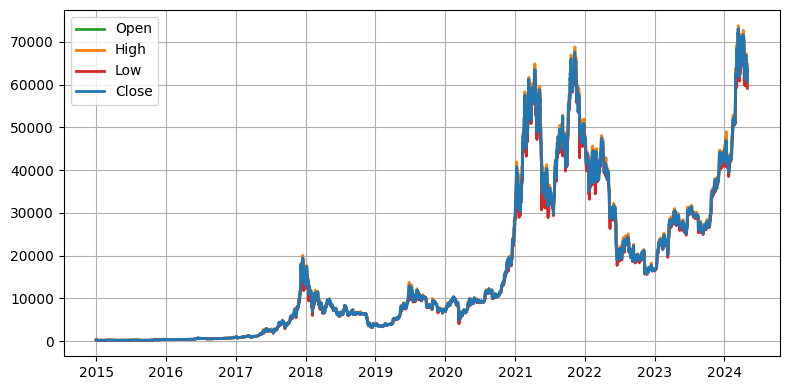

In [208]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df["Date"], df["Open"], color="tab:green", label="Open", linewidth=2)
ax.plot(df["Date"], df["High"], color="tab:orange", label="High", linewidth=2)
ax.plot(df["Date"], df["Low"], color="tab:red", label="Low", linewidth=2)
ax.plot(df["Date"], df["Close"], color="tab:blue", label="Close", linewidth=2)

ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.set_title("", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)


plt.tight_layout()
plt.show()

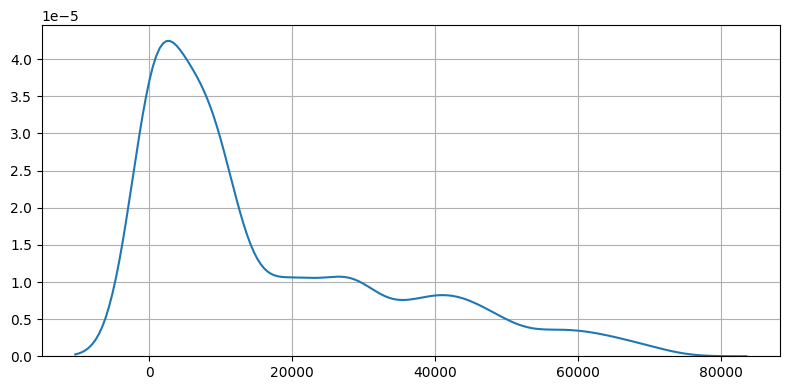

In [209]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.kdeplot(data=df, x='Open', bw_adjust=1)

# ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.set_title("", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
# ax.legend(loc="best")
ax.grid(True)


plt.tight_layout()
plt.show()

### 3. Data Preprocessing

In [210]:
# Choose Feature : Close Price
data = df.filter(["Close"])
data = data.values

In [211]:
# Show Result Feature Selection
np.round(data[:5],6)


array([[314.248993],
       [315.032013],
       [281.082001],
       [264.195007],
       [274.473999]])

In [212]:
# Show Dimension Data
print("Dimension of Dataset : "+str(data.shape))

Dimension of Dataset : (3408, 1)


- Normalization Data with MinMaxScaler

In [213]:
# Normalize Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(np.array(data).reshape(-1,1))

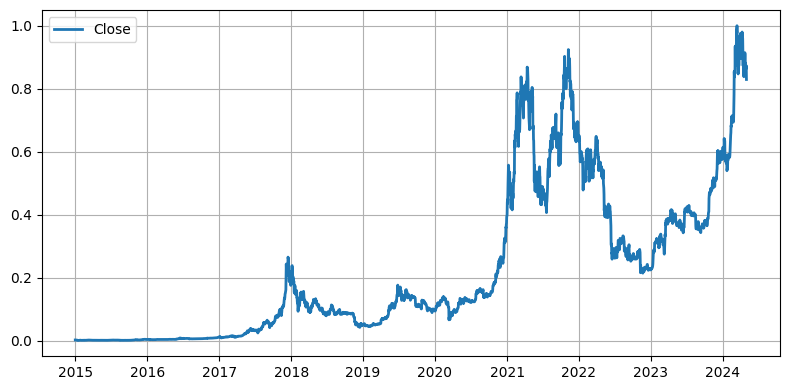

In [214]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df["Date"], scaled, color="tab:blue", label="Close", linewidth=2)

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(loc="best")
ax.grid(True)

plt.tight_layout()
plt.show()

### 4. Splitting Data

In [215]:
# Train & Test Data
train_data, test_data = train_test_split(scaled, train_size=0.8, test_size=0.2, shuffle=False)

# Check Result Splitting
print("Dimension of Data Train : "+str(train_data.shape))
print("Dimension of Data Test  : "+str(test_data.shape))

Dimension of Data Train : (2726, 1)
Dimension of Data Test  : (682, 1)


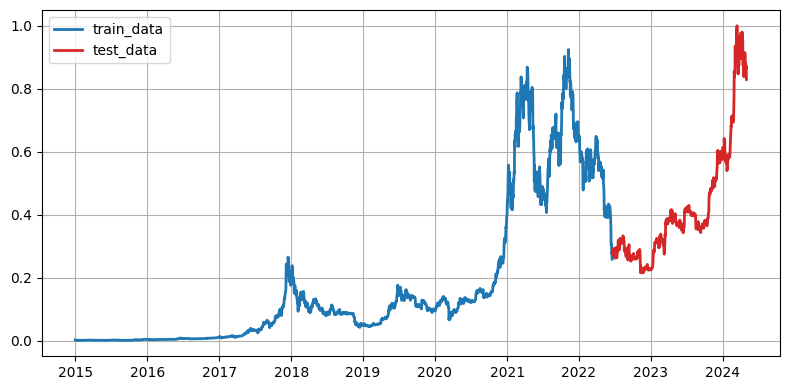

In [216]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    df["Date"].iloc[0:len(train_data)], train_data, color="tab:blue", label="train_data", linewidth=2
)
ax.plot(
    df["Date"].iloc[len(train_data):], test_data, color="tab:red", label="test_data", linewidth=2
)

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(loc="best")
ax.grid(True)

plt.tight_layout()
plt.show()

### 5. Supervised Learning on Time Series

In [217]:
# Function for Supervised Learning
def create_dataset(look_back, dataset):

    # Declare Variable X & Y
    dataX = []
    dataY = []

    # For loop for create supervised learning
    for i in range(look_back, len(dataset)):
        dataX.append(dataset[i-look_back:i, 0])
        dataY.append(dataset[i, 0])

    # Return value X and Y
    return np.array(dataX), np.array(dataY)

In [218]:
# Supervised Learning
x_train, y_train = create_dataset(60, train_data)

# Result of Supervised Learning
print("Dimension of XTrain : "+str(x_train.shape))
print("Dimension of YTrain : "+str(y_train.shape))

Dimension of XTrain : (2666, 60)
Dimension of YTrain : (2666,)


In [219]:
# Supervised Learning
x_test, y_test = create_dataset(60, test_data)

# Result of Supervised Learning
print("Dimension of XTest : "+str(x_test.shape))
print("Dimension of YTest : "+str(y_test.shape))

Dimension of XTest : (622, 60)
Dimension of YTest : (622,)


In [220]:
# Reshape Input to be Sample, Time Step, and Feature
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Result of Input LSTM
print("Dimension of XTrain : "+str(x_train.shape))
print("Dimension of YTrain : "+str(y_train.shape))

# Result of Input LSTM
print("Dimension of XTest  : "+str(x_test.shape))
print("Dimension of YTest  : "+str(y_test.shape))

Dimension of XTrain : (2666, 60, 1)
Dimension of YTrain : (2666,)
Dimension of XTest  : (622, 60, 1)
Dimension of YTest  : (622,)


### 6. Implementation of Hyperparameter using Grid-SearchCV

In [221]:
# from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import GridSearchCV


In [222]:
import itertools
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [223]:
# Function Models LSTM-RNN
def get_model(optimizer='adam'):
    tf.keras.backend.clear_session()
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1))),
        tf.keras.layers.Bidirectional(LSTM(units=50, return_sequences=False)),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(1),
    
    ])

    # Compile Models
    model.compile(optimizer=optimizer, loss="mean_squared_error")
    return model

In [224]:
# Set Parameter Optimizer
# optimizer = ['adam', 'adamax', 'rmsprop', 'sgd']  # Full Version Unavailable
optimizer = ['adam', 'adamax']  # Lite Version

In [225]:
# Set Parameter Batch Sizes
# batch_size = [8, 16, 24, 32] # Full Version Unavailable
batch_size = [8, 16] # Lite Version

In [226]:
# Set Parameter Epochs
# Epoch = [25, 50, 75, 100] # Full Version Unavailaleble
epochs = [25] # Lite Version

In [227]:
# Set All Parameter to Dictionary
param_grid = dict(  
    model__optimizer=optimizer,
    batch_size=batch_size,
    epochs=epochs
)

In [228]:
# Show Parameter a Grid-Search
param_grid

{'model__optimizer': ['adam', 'adamax'], 'batch_size': [8, 16], 'epochs': [25]}

In [229]:
keys = param_grid.keys()
values = (param_grid[key] for key in keys)
combinations = [dict(zip(keys, combination)) for combination in itertools.product(*values)]
print(len(combinations), str('Kombinasi Hyperparameter'))

4 Kombinasi Hyperparameter


In [230]:
# Set Grid Model with Keras Regressor
grid_model = KerasRegressor(model=get_model, verbose=1)

In [231]:
# Process a Grid-SearchCV
grid_search = GridSearchCV(estimator=grid_model, param_grid=param_grid, n_jobs=-1, cv=2, scoring='neg_root_mean_squared_error')

In [232]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense

# Custom LSTM Class
class CustomLSTM(tf.keras.Model):
    def __init__(self, input_shape, lstm_units=64, dropout_rate=0.2):
        super(CustomLSTM, self).__init__()

        self.lstm1 = Bidirectional(LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape))
        self.lstm2 = Bidirectional(LSTM(units=lstm_units*2, return_sequences=True))
        self.lstm3 = Bidirectional(LSTM(units=lstm_units*4, return_sequences=False))

        self.dropout = Dropout(dropout_rate)
        self.fc = Dense(1)

    def call(self, x, training=False):
        x = self.lstm1(x)
        x = self.lstm2(x)
        x = self.lstm3(x)
        x = self.dropout(x, training=training)
        x = self.fc(x)
        return x


In [233]:
def create_model(input_shape=(10, 1), lstm_units=64, dropout_rate=0.2, optimizer='adam'):
    from tensorflow.keras import Input, Model
    from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense

    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(units=lstm_units*2, return_sequences=True))(x)
    x = Bidirectional(LSTM(units=lstm_units*4, return_sequences=False))(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1)(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


In [234]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

def grid_search_model(x_train, y_train):
    reg = KerasRegressor(
        model=create_model,
        input_shape=(x_train.shape[1], 1),
        verbose=0
    )

    param_grid = {
        'model__optimizer': ['adam', 'adamax'],
        'batch_size': [8, 16, 24, 32],
        'epochs': [25, 50]
    }

    grid_search = GridSearchCV(
        estimator=reg,
        param_grid=param_grid,
        n_jobs=-1,
        cv=2,
        scoring='neg_root_mean_squared_error',
        return_train_score=True
    )

    grid_search.fit(x_train, y_train)

    print(f"Best Score: {grid_search.best_score_}")
    print(f"Best Params: {grid_search.best_params_}")

    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    params = grid_search.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    return grid_search


In [235]:
import numpy as np
x_train = np.random.rand(100, 10, 1)
y_train = np.random.rand(100)

grid_result = grid_search_model(x_train, y_train)


c:\Users\lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Score: -0.3106146591822257
Best Params: {'batch_size': 8, 'epochs': 25, 'model__optimizer': 'adam'}
-0.310615 (0.007798) with: {'batch_size': 8, 'epochs': 25, 'model__optimizer': 'adam'}
-0.316058 (0.004424) with: {'batch_size': 8, 'epochs': 25, 'model__optimizer': 'adamax'}
-0.319462 (0.005453) with: {'batch_size': 8, 'epochs': 50, 'model__optimizer': 'adam'}
-0.315475 (0.005195) with: {'batch_size': 8, 'epochs': 50, 'model__optimizer': 'adamax'}
-0.325343 (0.010659) with: {'batch_size': 16, 'epochs': 25, 'model__optimizer': 'adam'}
-0.315053 (0.000641) with: {'batch_size': 16, 'epochs': 25, 'model__optimizer': 'adamax'}
-0.323176 (0.000410) with: {'batch_size': 16, 'epochs': 50, 'model__optimizer': 'adam'}
-0.328390 (0.014033) with: {'batch_size': 16, 'epochs': 50, 'model__optimizer': 'adamax'}
-0.318352 (0.012334) with: {'batch_size': 24, 'epochs': 25, 'model__optimizer': 'adam'}
-0.314545 (0.002015) with: {'batch_size': 24, 'epochs': 25, 'model__optimizer': 'adamax'}
-0.311659